<a href="https://colab.research.google.com/github/AkshataKishore/IML/blob/master/EDA_PCOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"
%cd /content/drive/My Drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Advertising.html
'Akshata KM Resume.pdf'
'Akshata Resume.pdf'
'Colab Notebooks'
'Data Science and Big Data Analytics.pdf'
'Document Back up Boeing '
 Epic_Data_Analysis.ipynb
 Epic_Sample.csv
 FeatureHumana.csv
 holdout.csv
 holdoutmodel.csv
 inputmodel.csv
 interpretable_tree.png
 modeldata.csv
'New_data (1).csv'
 New_data.csv
 NYSDOH_HospitalInpatientDischarges_SPARCS_De-Identified_2017.csv
 OutputResultsHumana.csv
 PCOS_Data.csv
 SWEETVIZ_REPORT.html
'UMD Textbooks'
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
'USA Visa Documents'
/content/drive/My Drive


In [3]:
import time,os,json
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot') # random state
SEED=100
time_start_notebook = time.time()
home = os.path.expanduser('~')
[(x.__name__,x.__version__) for x in [np,pd,sns]]
import pandas as pd 
df = pd.read_csv('PCOS_Data.csv')
from sklearn.model_selection import train_test_split

target = 'PCOS (Y/N)'

df_Xtrain, df_Xtest, ser_ytrain, ser_ytest = train_test_split(
    df.drop(target,axis=1), df[target],
    test_size=0.2, random_state=SEED, stratify=df[target])

ytrain = ser_ytrain.to_numpy().ravel()
ytest = ser_ytest.to_numpy().ravel()

features_train = df_Xtrain.columns.to_list()
features_train

[' Age (yrs)',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm) ',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Cycle(R/I)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'Pregnant(Y/N)',
 'No. of aborptions',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'Hip(inch)',
 'Waist(inch)',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

In [3]:
df.head()  #Display top 5 records

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,FSH(mIU/mL),LH(mIU/mL),Hip(inch),Waist(inch),TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,5,7.0,0,0,7.95,3.68,36,30,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,11.0,1,0,6.73,1.09,38,32,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,10.0,1,0,5.54,0.88,40,36,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,4.0,0,0,8.06,2.36,42,36,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,1.0,1,0,3.98,0.90,37,30,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
df.describe(include='all') # analytical summary of the dataset

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,FSH(mIU/mL),LH(mIU/mL),Hip(inch),Waist(inch),TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.00000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,0.325142,31.406427,59.670132,156.436476,24.338638,13.797732,73.478261,19.241966,11.158563,2.557656,4.941399,7.630813,0.385633,0.283554,5.261121,2.756155,38.013233,33.846881,2.976336,5.622388,24.39741,28.949316,0.618206,99.871834,0.378072,0.274102,0.302457,0.449905,0.485822,0.514178,0.241966,114.801512,77.088847,6.105860,6.659735,15.018526,15.452495,8.494272
std,0.468871,5.443515,11.100514,6.021679,4.082604,1.847068,2.705914,1.697273,0.864174,0.900853,1.500747,4.806145,0.487205,0.684607,4.462897,2.317071,4.000215,3.627180,3.751471,5.927907,15.04944,12.565367,3.851575,18.719245,0.485365,0.446483,0.459757,0.497955,0.500272,0.500272,0.428679,5.935920,4.710728,4.222072,4.446388,3.585022,3.338548,2.167970
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,70.000000,16.000000,8.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.210000,0.020000,26.000000,24.000000,0.040000,0.100000,0.40000,6.077000,0.047000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,52.000000,152.000000,21.833562,13.000000,72.000000,18.000000,10.500000,2.000000,5.000000,4.000000,0.000000,0.000000,3.340000,1.030000,36.000000,32.000000,1.470000,2.010000,14.52000,20.700000,0.250000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.300000,14.000000,72.000000,18.000000,11.000000,2.000000,5.000000,7.000000,0.000000,0.000000,4.860000,2.260000,38.000000,34.000000,2.260000,3.700000,21.92000,25.900000,0.320000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.700000,15.000000,74.000000,20.000000,11.700000,4.000000,5.000000,10.000000,1.000000,0.000000,6.400000,3.670000,40.000000,36.000000,3.570000,6.900000,29.97000,34.400000,0.460000,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,12.000000,30.000000,1.000000,5.000000,65.400000,14.690000,48.000000,47.000000,65.000000,66.000000,128.24000,90.000000,85.000000,350.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             529 non-null    int64  
 1    Age (yrs)             529 non-null    int64  
 2   Weight (Kg)            529 non-null    float64
 3   Height(Cm)             529 non-null    float64
 4   BMI                    529 non-null    float64
 5   Blood Group            529 non-null    int64  
 6   Pulse rate(bpm)        529 non-null    int64  
 7   RR (breaths/min)       529 non-null    int64  
 8   Hb(g/dl)               529 non-null    float64
 9   Cycle(R/I)             529 non-null    int64  
 10  Cycle length(days)     529 non-null    int64  
 11  Marraige Status (Yrs)  529 non-null    float64
 12  Pregnant(Y/N)          529 non-null    int64  
 13  No. of aborptions      529 non-null    int64  
 14  FSH(mIU/mL)            529 non-null    float64
 15  LH(mIU

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a775024e0>,
      dtype=object)

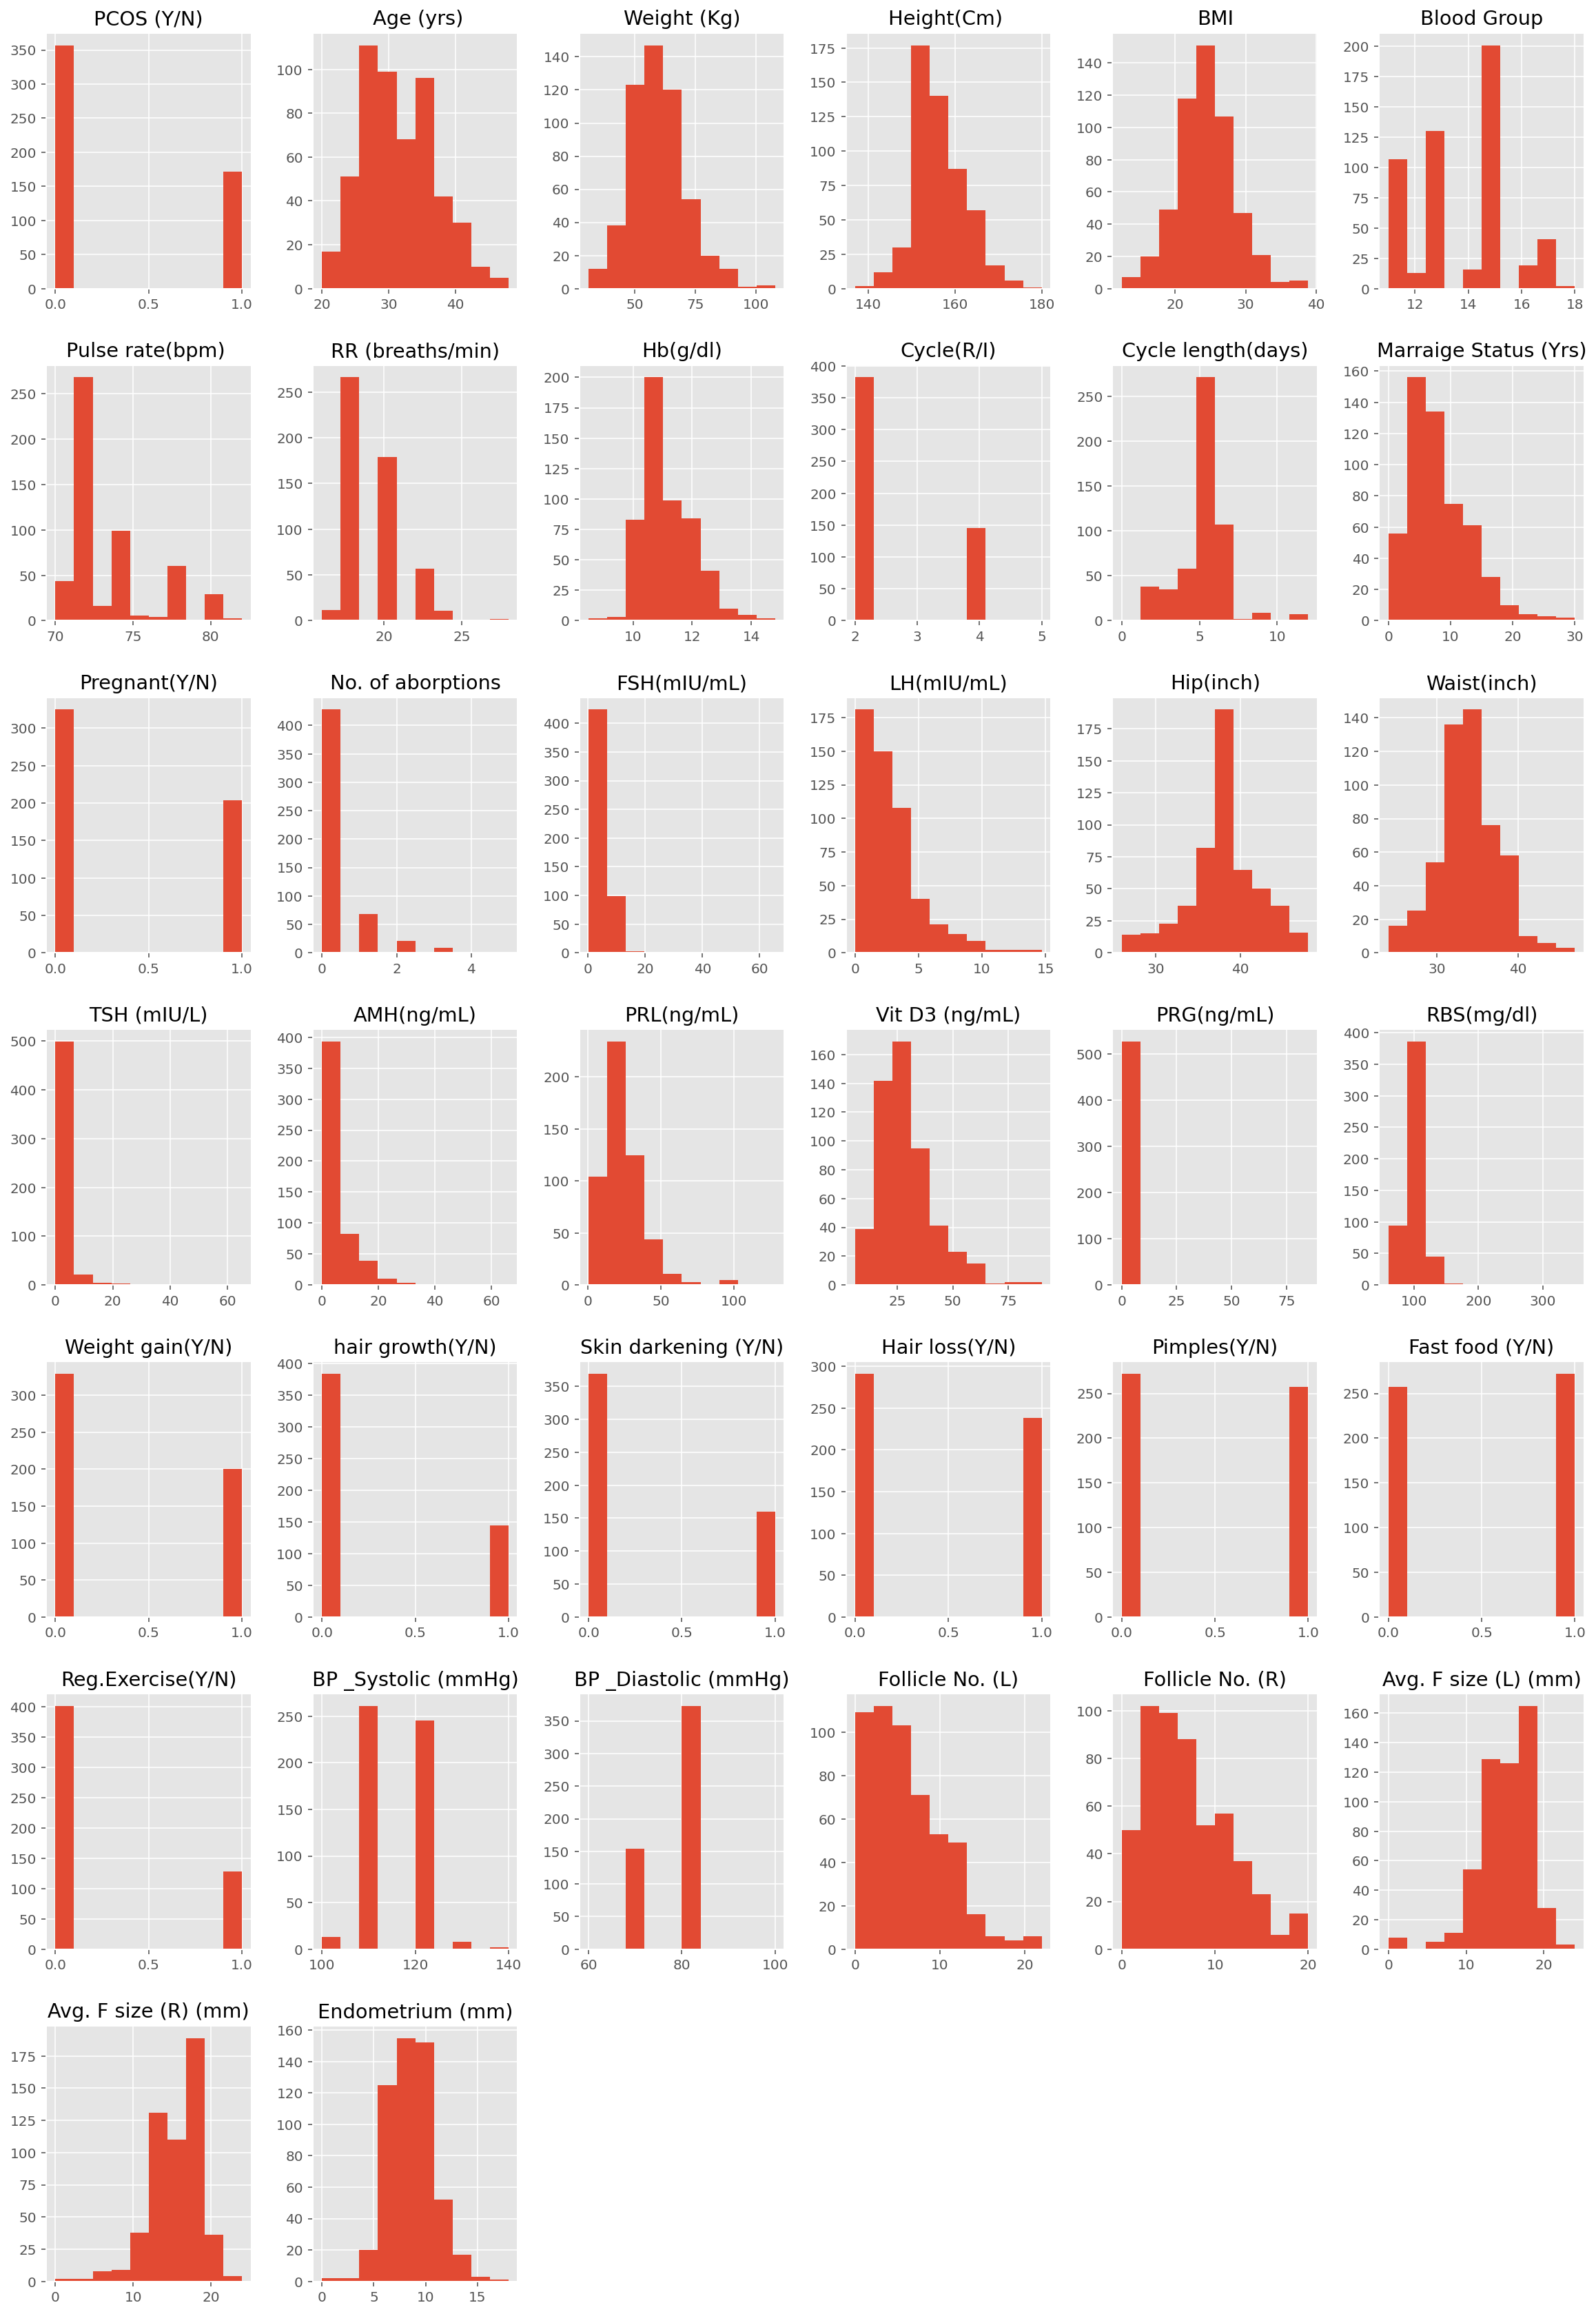

In [5]:
df.hist(figsize=(20,30)) 

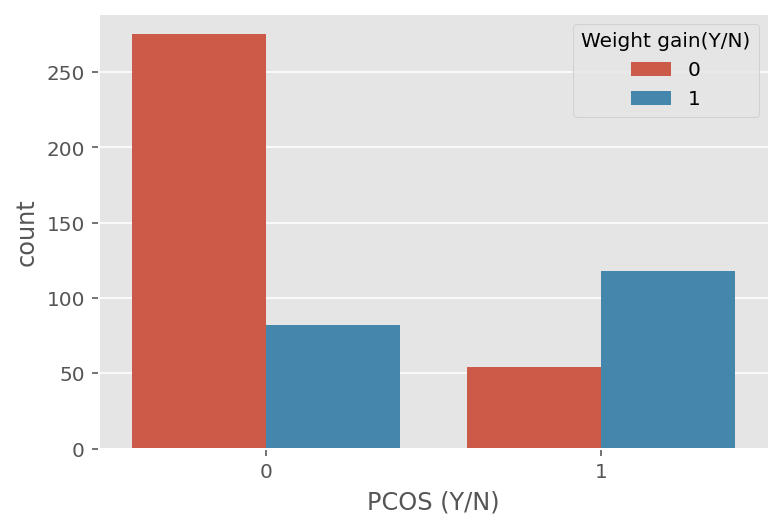

In [6]:
#Relationship between two categorical variables
sns.countplot(x="PCOS (Y/N)", hue = "Weight gain(Y/N)", data = df)

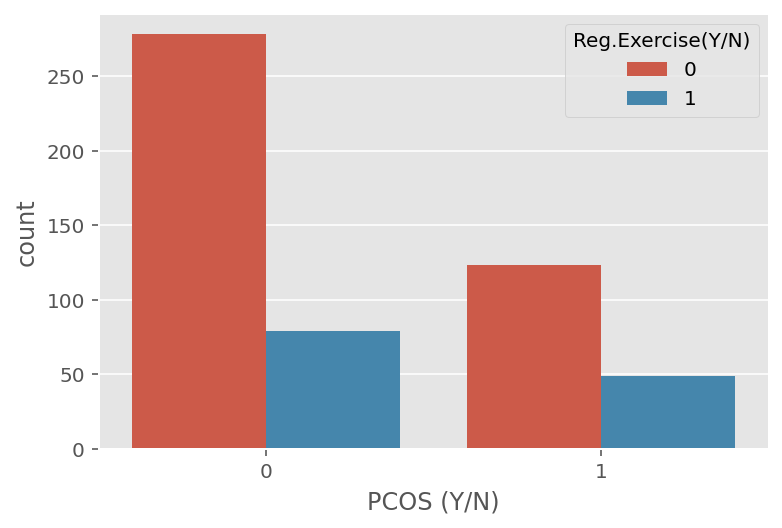

In [ ]:
#Relationship between two categorical variables
sns.countplot(x="PCOS (Y/N)", hue = "Reg.Exercise(Y/N)", data = df)

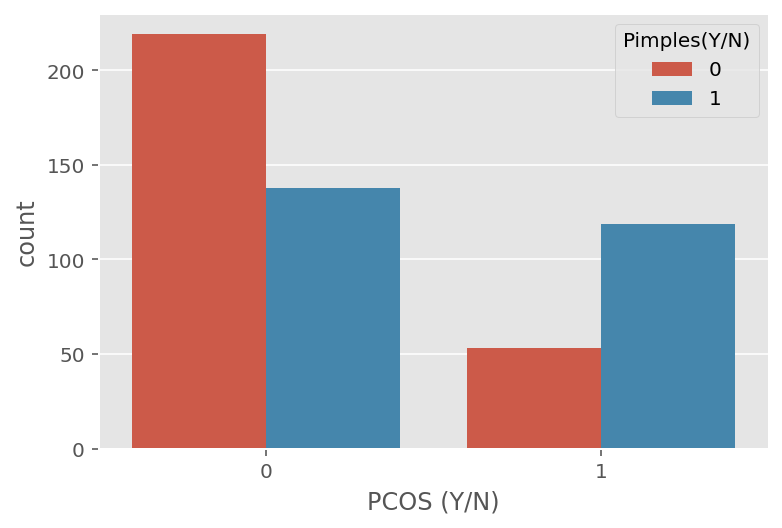

In [ ]:
#Relationship between two categorical variables
sns.countplot(x="PCOS (Y/N)", hue = "Pimples(Y/N)", data = df)

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


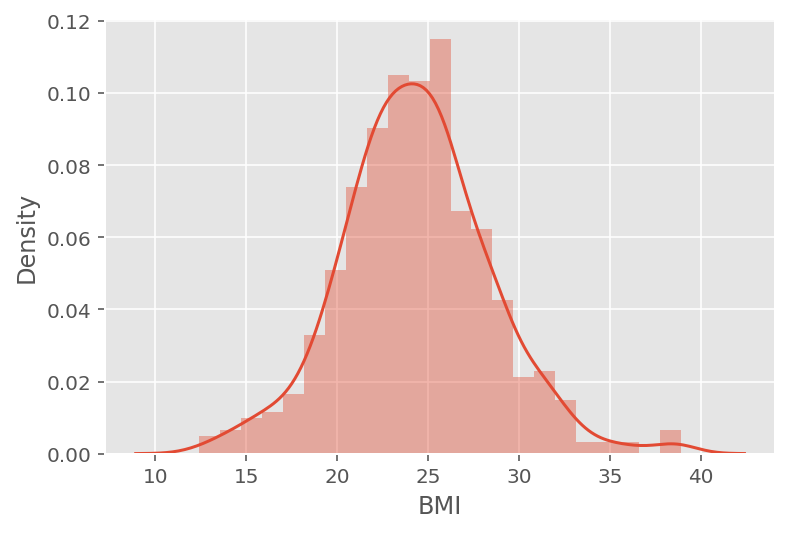

In [5]:
sns.distplot(df['BMI'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


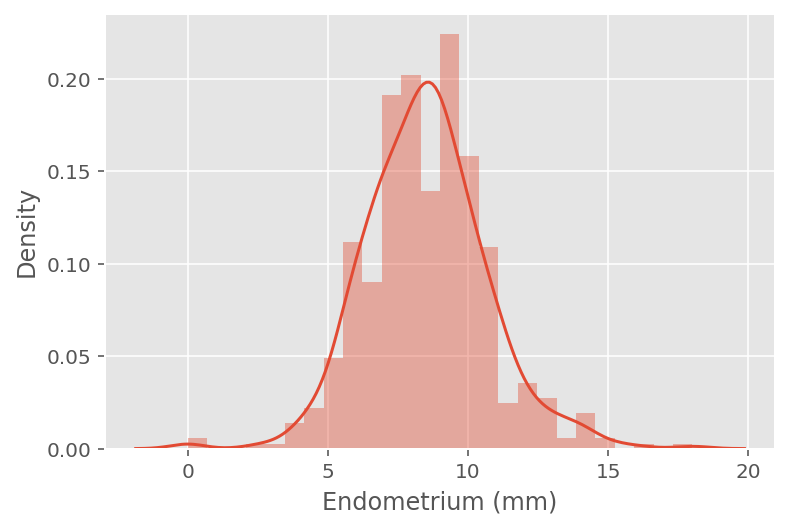

In [6]:
sns.distplot(df['Endometrium (mm)'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c89592400>,
      dtype=object)

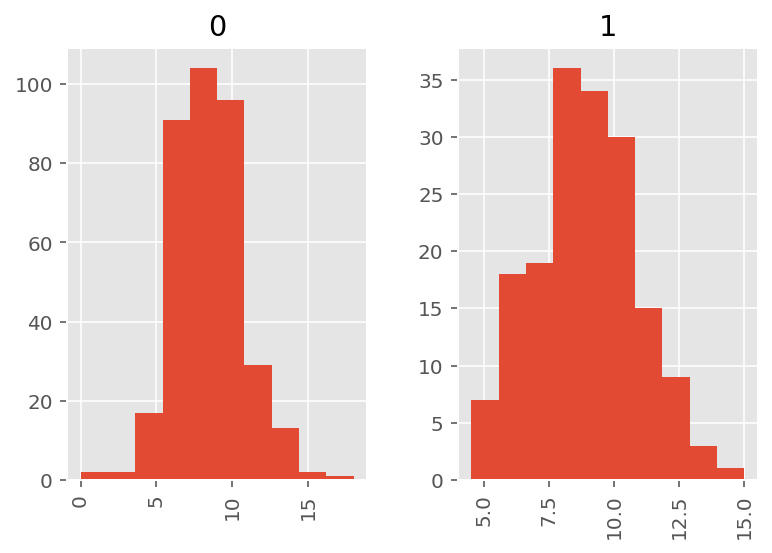

In [7]:
df.hist(by='PCOS (Y/N)', column = 'Endometrium (mm)')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c88f3ee80>,
      dtype=object)

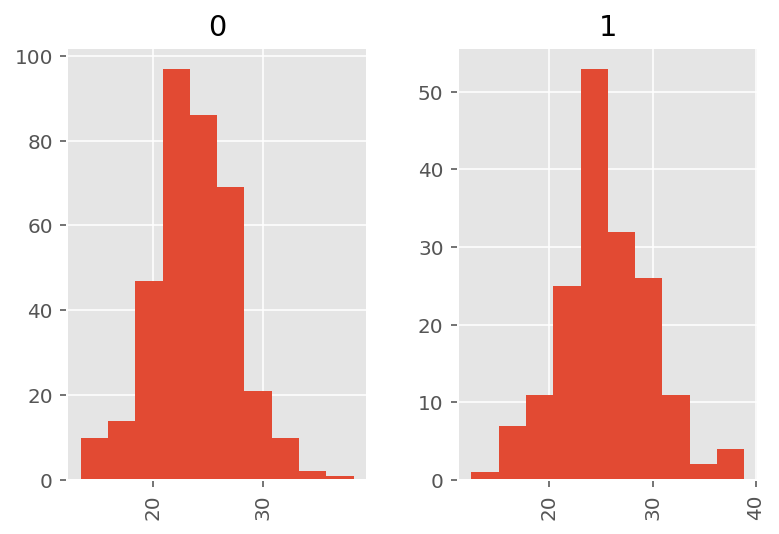

In [8]:
df.hist(by='PCOS (Y/N)', column = 'BMI')

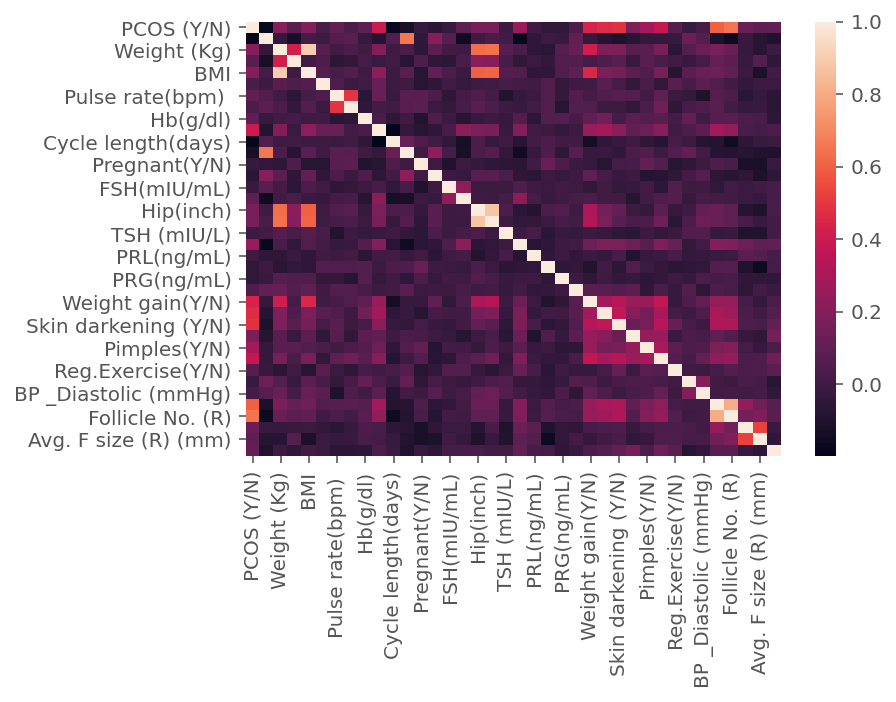

In [10]:
corr= df.corr()
sns.heatmap(corr)

In [ ]:
sns.pairplot(df)